Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


Load the dataset

In [2]:
df = loadtxt('data_oversampled.csv',skiprows = 1, delimiter=',')

In [3]:
df

array([[  1. ,  85. ,  26.6,  31. ,   0. ],
       [  1. ,  89. ,  28.1,  21. ,   0. ],
       [  5. , 116. ,  25.6,  30. ,   0. ],
       ...,
       [ 11. , 120. ,  42.3,  48. ,   1. ],
       [ 12. ,  92. ,  27.6,  44. ,   1. ],
       [  6. , 102. ,  30.8,  36. ,   1. ]])

Splitting the dataset

In [4]:
# split into input (X) and output (y) variables
x = df[:,0:4]
y = df[:,4]

Standardisation

In [5]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

Build the Keras Model

In [6]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 5 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(128, input_dim=4, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=0, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [7]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 650us/step - loss: 0.3452 - accuracy: 0.8647
Training Accuracy: 86.47
7/7 [==============================] - 0s 667us/step - loss: 0.4465 - accuracy: 0.7864
Validation Accuracy: 78.64


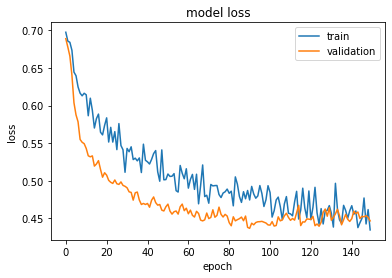

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [27]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 4 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=0, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                320       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 8)                 136       
                                                                 
 dropout_25 (Dropout)        (None, 8)                

In [28]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 600us/step - loss: 0.4318 - accuracy: 0.8511
Training Accuracy: 85.11
7/7 [==============================] - 0s 667us/step - loss: 0.5484 - accuracy: 0.8000
Validation Accuracy: 80.00


In [29]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 3 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(32, input_dim=4, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=0, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                160       
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 4)                

In [13]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 600us/step - loss: 0.3693 - accuracy: 0.8389
Training Accuracy: 83.89
7/7 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.7909
Validation Accuracy: 79.09


In [14]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 2 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(16, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=0, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                80        
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dropout_15 (Dropout)        (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 4)                 36        
                                                                 
 dropout_16 (Dropout)        (None, 4)                 0         
                                                                 
 dense_21 (Dense)            (None, 1)                

In [16]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 650us/step - loss: 0.4143 - accuracy: 0.8131
Training Accuracy: 81.31
7/7 [==============================] - 0s 667us/step - loss: 0.4565 - accuracy: 0.7818
Validation Accuracy: 78.18


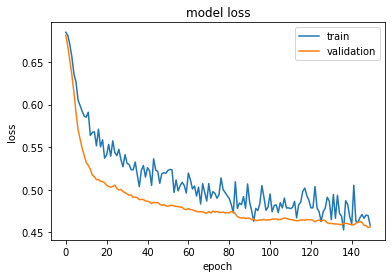

In [17]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 1 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=0, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 8)                 40        
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 4)                 36        
                                                                 
 dropout_18 (Dropout)        (None, 4)                 0         
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [19]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 600us/step - loss: 0.4240 - accuracy: 0.8085
Training Accuracy: 80.85
7/7 [==============================] - 0s 667us/step - loss: 0.4608 - accuracy: 0.7636
Validation Accuracy: 76.36


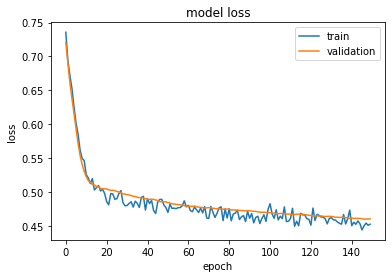

In [20]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# NO hidden layers
# define the keras model
model = Sequential()

model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=0, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dropout_19 (Dropout)        (None, 4)                 0         
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [22]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 650us/step - loss: 0.4602 - accuracy: 0.7660
Training Accuracy: 76.60
7/7 [==============================] - 0s 834us/step - loss: 0.4888 - accuracy: 0.7227
Validation Accuracy: 72.27


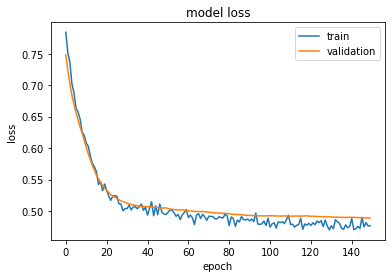

In [23]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()